In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

### Import monthly files for Diatoms

In [3]:

#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [4]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))

(14, 12)


### Import monthly files for nanoflagellates

In [5]:

#years, months, data
monthly_array_flagellates_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['flagellates']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_flagellates_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['flagellates']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_flagellates_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['flagellates']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)      
        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [6]:
monthly_array_flagellates_depthint_slice[monthly_array_flagellates_depthint_slice == 0 ] = np.nan
monthly_array_flagellates_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_flagellates_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_flagellates_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

#### For diatoms:

In [7]:
#2008, 2010, 2011, 2012
NPGO_C_D=(((+monthly_array_diatoms_depthint_slicemean[1,:]+\
        monthly_array_diatoms_depthint_slicemean[3,:]+\
        monthly_array_diatoms_depthint_slicemean[4,:]+monthly_array_diatoms_depthint_slicemean[5,:])/4))

In [8]:
#2015, 2018, 2019, 2020
NPGO_W_D=(((monthly_array_diatoms_depthint_slicemean[8,:]+\
        monthly_array_diatoms_depthint_slicemean[11,:]+monthly_array_diatoms_depthint_slicemean[12,:]+\
        monthly_array_diatoms_depthint_slicemean[13,:])/4))

#### For nanoflagellates:

In [9]:
#2008, 2010, 2011, 2012
NPGO_C_F=(((+monthly_array_flagellates_depthint_slicemean[1,:]+\
        monthly_array_flagellates_depthint_slicemean[3,:]+\
        monthly_array_flagellates_depthint_slicemean[4,:]+monthly_array_flagellates_depthint_slicemean[5,:])/4))

In [10]:
#2015, 2018, 2019, 2020
NPGO_W_F=(((monthly_array_flagellates_depthint_slicemean[8,:]+\
        monthly_array_flagellates_depthint_slicemean[11,:]+monthly_array_flagellates_depthint_slicemean[12,:]+\
        monthly_array_flagellates_depthint_slicemean[13,:])/4))

### Plot phytoplankton biomass for cold and warm years

Text(0.25, 35, '(a)')

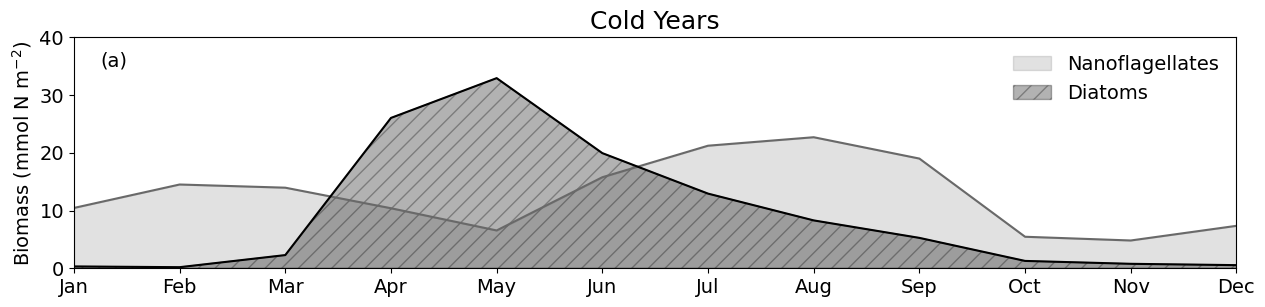

In [11]:
## Cold Years

fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, NPGO_C_F,color='dimgrey') #wheat
ax.fill_between(xticks,NPGO_C_F,color='dimgrey',alpha=.2,label='Nanoflagellates') #wheat
ax.plot(xticks, NPGO_C_D,color='black') #lightgreen
ax.fill_between(xticks,NPGO_C_D,color='black',hatch='//',alpha=.3,label='Diatoms') #lightgreen
ax.set_title('Cold Years',fontsize=18)
ax.legend(frameon=False,loc=1,fontsize=14)
ax.set_ylim(0,40)
ax.set_xlim(0,11)
ax.set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.text(.25, 35, "(a)", color='k',fontsize=14)

#plt.savefig('Fig4a_phytocoldyears.png', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.25, 35, '(b)')

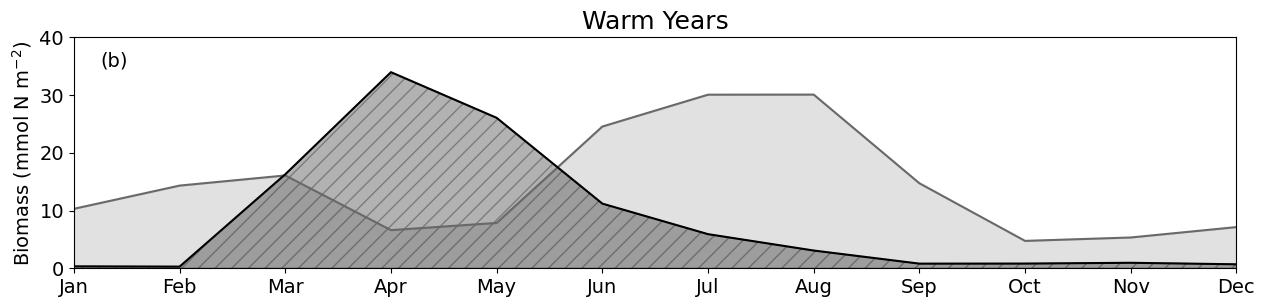

In [12]:
## Warm Years

fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, NPGO_W_F,color='dimgrey')
ax.fill_between(xticks,NPGO_W_F,color='dimgrey',alpha=.2)
ax.plot(xticks, NPGO_W_D,color='black')
ax.fill_between(xticks,NPGO_W_D,color='black',hatch='//',alpha=.3)
ax.set_title('Warm Years',fontsize=18)
ax.set_ylim(0,40)
ax.set_xlim(0,11)
ax.set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.text(.25, 35, "(b)", color='k',fontsize=14)

#plt.savefig('Fig4b_phytowarmyears.png', bbox_inches='tight',dpi=1000,transparent=False)

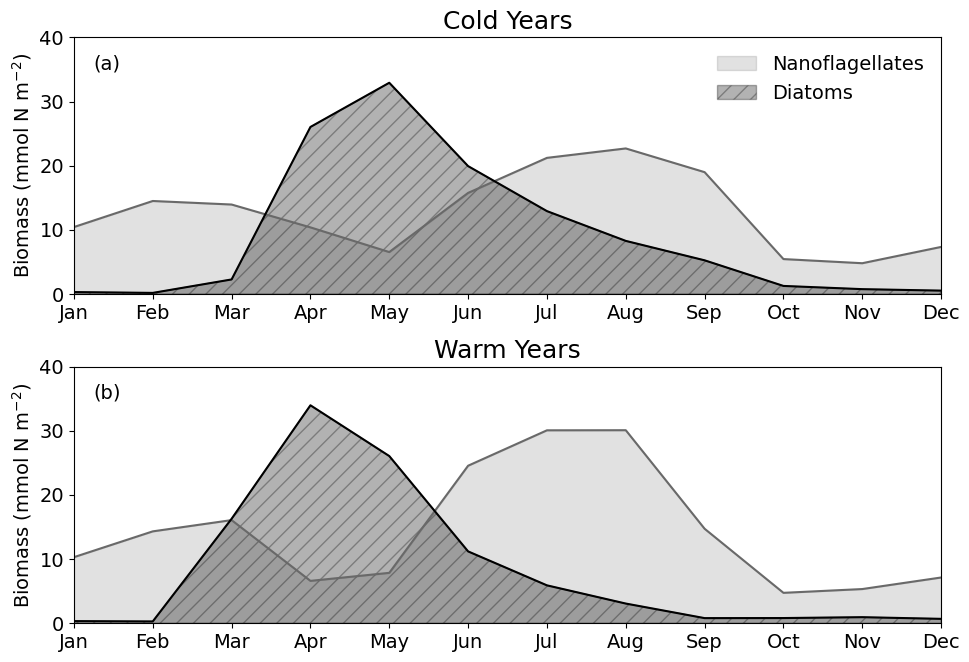

In [22]:
fig, ax = plt.subplots(2,1, figsize=(10, 7))

fig.tight_layout(pad=2.5)

bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 1}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax[0].plot(xticks, NPGO_C_F,color='dimgrey') #wheat
ax[0].fill_between(xticks,NPGO_C_F,color='dimgrey',alpha=.2,label='Nanoflagellates') #wheat
ax[0].plot(xticks, NPGO_C_D,color='black') #lightgreen
ax[0].fill_between(xticks,NPGO_C_D,color='black',hatch='//',alpha=.3,label='Diatoms') #lightgreen
ax[0].set_title('Cold Years',fontsize=18)
ax[0].legend(frameon=False,loc=1,fontsize=14)
ax[0].set_ylim(0,40)
ax[0].set_xlim(0,11)
ax[0].set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].text(.25, 35, "(a)", color='k',fontsize=14)


ax[1].plot(xticks, NPGO_W_F,color='dimgrey')
ax[1].fill_between(xticks,NPGO_W_F,color='dimgrey',alpha=.2)
ax[1].plot(xticks, NPGO_W_D,color='black')
ax[1].fill_between(xticks,NPGO_W_D,color='black',hatch='//',alpha=.3)
ax[1].set_title('Warm Years',fontsize=18)
ax[1].set_ylim(0,40)
ax[1].set_xlim(0,11)
ax[1].set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)

ax[1].text(.25, 35, "(b)", color='k',fontsize=14)

#plt.savefig('Figure4_PhytoplanktonBiomass.png', bbox_inches='tight',dpi=1000,transparent=False)